# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import time
import regex as re
import seaborn as sns  


# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here

employee = pd.read_csv("./Employee.csv",encoding = "ISO-8859-1")
orders = pd.read_csv("./Orders.csv",encoding = "ISO-8859-1")
temp = pd.read_csv("./Temp_States.csv",encoding = "ISO-8859-1")

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# your answer here
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
# your answer here

temp.loc[(temp["State"] == 'New York')]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
# your answer here
a = temp.loc[(temp["State"] == 'New York')]

tempNY = list(a['Temperature'])
tempNY


[19.444444444444443, 9.444444444444443, 3.333333333333333]

In [7]:
np.array(tempNY).mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [8]:
# your answer here
temp.loc[(temp["Temperature"] > 15)]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [9]:
# your answer here
list(temp.loc[(temp["Temperature"] > 15)] ['City'])

['NYC', 'Hartford', 'Treton', 'Newark']

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [10]:
# your answer here
list(temp.loc[(temp["Temperature"] > 15) &(temp["Temperature"] < 20)] ['City'])

['NYC', 'Hartford']

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [11]:
# your answer here
def std_state(State):
    b = temp.loc[(temp["State"] == State)]
    tempSt = list(b['Temperature'])
    
    N=len(tempSt)
    
    media=round(sum(tempSt)/N, 3)
    st_dev = round((sum([(e-media)**2 for e in tempSt])/N)**.5, 3)
    print(f"The state of {State} has a {media} of media and a standard deviation of {st_dev}")
    return 


std_state('New York')
std_state('Connecticut')
std_state('New Jersey')

The state of New York has a 10.741 of media and a standard deviation of 6.641
The state of Connecticut has a 15.833 of media and a standard deviation of 1.389
The state of New Jersey has a 21.111 of media and a standard deviation of 1.111


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [12]:
# your answer here
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [13]:
# your answer here
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

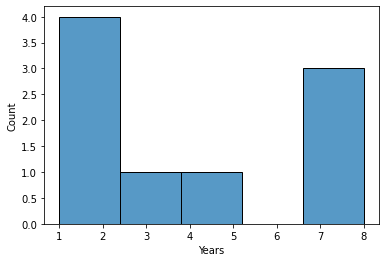

In [14]:
# your answer here
sns.histplot(x=employee.Years);

#### What's the average salary in this company?

In [15]:
# your answer here
np.array(list(employee.Salary)).mean()


48.888888888888886

#### What's the highest salary?

In [16]:
# your answer here
np.array(list(employee.Salary)).max()

70

#### What's the lowest salary?

In [17]:
# your answer here
np.array(list(employee.Salary)).min()

30

#### Who are the employees with the lowest salary?

In [18]:
# your answer here
list(employee.loc[(employee['Salary']==30)]['Name'])

['Maria', 'David']

#### Could you give all the information about an employee called David?

In [19]:
# your answer here
employee.loc[(employee['Name']=='David')]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [20]:
# your answer here
print(f"David´s Salary is {int(employee.loc[(employee['Name']=='David')]['Salary'])}")

David´s Salary is 30


#### Print all the rows where job title is associate

In [21]:
# your answer here
employee.loc[(employee['Title']=='associate')]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [22]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [23]:
# your answer here- 2nd method
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [24]:
# your answer here
employee.loc[(employee['Title']=='associate')&(employee['Salary']>55)]['Name']

7    Pedro
Name: Name, dtype: object

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [25]:
# your answer here
employee.groupby(['Years']).mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [26]:
# your answer here
employee.groupby(['Title']).mean()

,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

In [27]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


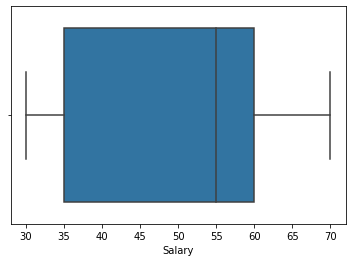

In [28]:
# draw boxplot here
sns.boxplot(x=employee.Salary);

In [29]:
# print first quartile here
np.quantile(employee['Salary'], 0.25)  

35.0

In [30]:
# print third quartile here
np.quantile(employee['Salary'], 0.75)  

60.0

#### Is the mean salary per gender different?

In [31]:
# your answer here
employee.groupby(['Gender']).mean()

,Years,Salary
Gender,,
F,4.0,47.5
M,4.2,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [32]:
# your answer here
a = employee.groupby(['Department']).mean().rename(columns={'Salary':'Salary_mean'})['Salary_mean']
b = employee.groupby(['Department']).max().rename(columns={'Salary':'Salary_max'})['Salary_max']
c = employee.groupby(['Department']).min().rename(columns={'Salary':'Salary_min'})['Salary_min']
max_min_mean=[a,b,c]
min_mean_max = pd.concat(max_min_mean, axis=1, ignore_index=False)
min_mean_max

,Salary_mean,Salary_max,Salary_min
Department,,,
HR,45.00,70,30
IT,48.75,70,30
Sales,55.00,55,55


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [33]:
min_mean_max['Computed'] = min_mean_max['Salary_max'] - min_mean_max['Salary_min']
min_mean_max

,Salary_mean,Salary_max,Salary_min,Computed
Department,,,,
HR,45.00,70,30,40
IT,48.75,70,30,40
Sales,55.00,55,55,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [63]:
# your answer here
orders.sample(4)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
367585,498301,578517,22578,2011,11,4,13,wooden star christmas scandinavian,48,2011-11-24 13:53:00,0.29,16523,United Kingdom,13.92
116569,171237,551398,22955,2011,4,4,13,36 foil star cake cases,6,2011-04-28 13:09:00,2.10,12417,Spain,12.60
94305,141731,548521,20754,2011,3,4,16,retrospot red washing up gloves,6,2011-03-31 16:41:00,2.10,17735,United Kingdom,12.60
138146,199550,554098,22196,2011,5,7,13,small heart measuring spoons,6,2011-05-22 13:01:00,0.85,14769,United Kingdom,5.10


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [35]:
# your answer here
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [36]:
# your answer here
orders.shape

(397924, 14)

####  What is the average Purchase Price?

In [37]:
# your answer here
#ENTIENDO EL PURCHASE PRICE COMO UNIT PRICE

np.array(list(orders.UnitPrice)).mean()

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [38]:
# your answer here
np.array(list(orders.UnitPrice)).max()

8142.75

In [39]:
# your answer here
np.array(list(orders.UnitPrice)).min()

0.0

#### Select all the customers we have in Spain

In [40]:
# your answer here
print(set(orders.loc[(orders['Country'] == 'Spain')]['CustomerID']))


{12544, 12545, 12417, 12547, 12548, 12421, 12550, 12551, 12546, 12556, 12557, 12442, 12445, 12448, 12450, 12454, 12455, 12462, 12596, 12597, 12354, 12484, 17097, 12502, 12507, 12510, 12538, 12539, 12540, 12541}


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [41]:
# your answer here
len(list(orders.loc[(orders['Country'] == 'Spain')]['CustomerID']))

2485

#### Select all the customers who have bought more than 50 items ?

In [60]:
# your answer here
ordersQuant = orders.groupby(['CustomerID']).sum()
ordersQuant.loc[(ordersQuant['Quantity'] > 50)].sample(4)

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,amount_spent
CustomerID,,,,,,,,,
15480,13579515,25350885,90495,360,45,630,303,191.87,905.50
13937,2147292,5021532,18099,54,36,144,123,15.25,158.85
14621,29446554,51888142,184996,903,376,1288,993,277.53,1788.36
12611,26273910,37158550,130715,650,130,845,846,173.88,1193.32


#### Select orders from Spain that are above 50 items

In [62]:
# your answer here
orders.loc[(orders['Country'] == 'Spain')& (orders['Quantity'] > 50)].sample(4)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
254097,355752,567968,85204,2011,9,5,9,hanging wood and felt flower,96,2011-09-23 09:44:00,0.12,12546,Spain,11.52
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
197167,282906,561669,23295,2011,7,4,17,set of 12 mini loaf baking cases,128,2011-07-28 17:09:00,0.72,12507,Spain,92.16


#### Select all free orders

In [68]:
# your answer here
orders.loc[orders['amount_spent'] == 0].sample(2)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
353097,479546,577168,M,2011,11,5,10,manual,1,2011-11-18 10:42:00,0.0,12603,Germany,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [70]:
# your answer here
orders[orders['Description'].str.contains('lunch bag')]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
169988,241585,558235,23208,2011,6,1,14,lunch bag vintage leaf design,4,2011-06-27 14:41:00,1.65,16242,United Kingdom,6.6
195001,279688,561359,20725,2011,7,2,15,lunch bag red retrospot,10,2011-07-26 15:29:00,1.65,17160,United Kingdom,16.5


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [72]:
# your answer here
orders.loc[(orders['year'] == 2011) & (orders['Description'].str.contains('lunch bag'))].sample(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
227627,321850,565207,22382,2011,9,4,16,lunch bag spaceboy design,3,2011-09-01 16:46:00,1.65,16764,United Kingdom,4.95
188871,270945,560601,22382,2011,7,2,17,lunch bag spaceboy design,2,2011-07-19 17:17:00,1.65,16764,United Kingdom,3.30
367841,498557,578522,20727,2011,11,4,14,lunch bag black skull.,1,2011-11-24 14:09:00,1.65,17254,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

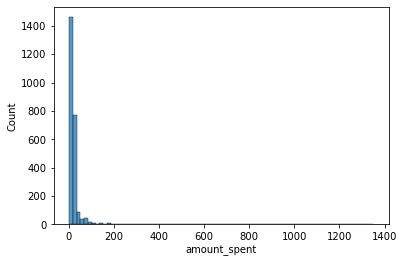

In [100]:
# your answer here
a = orders.loc[(orders['Country'] == 'Spain')]
sns.histplot(x=a.amount_spent, bins=80);

#### Select all orders made in the month of August

In [103]:
# your answer here
orders.loc[(orders['month'] == 8)].sample(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
223934,314748,564651,21786,2011,8,5,14,polkadot rain hat,144,2011-08-26 14:19:00,0.00,14646,Netherlands,0.0
203431,290269,562371,23202,2011,8,4,14,jumbo bag vintage leaf,10,2011-08-04 14:30:00,2.08,13709,United Kingdom,20.8
223666,314422,564637,22752,2011,8,5,12,set 7 babushka nesting boxes,2,2011-08-26 12:49:00,8.50,16641,United Kingdom,17.0


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [105]:
# your answer here

orders[(orders['month'] == 8)] ['Country'].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [112]:
# your answer here
orders.groupby(orders['Country'])['amount_spent'].mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [114]:
# your answer here
orders['amount_spent'].max()

168469.6

#### What was the average amount spent per year ?

In [116]:
# your answer here
orders.groupby(orders['year'])['amount_spent'].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64